<strong>Building a Predictive System</strong>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import warnings



In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('Hd.csv')



In [3]:
 #print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<strong>1 --> Defective Heart</strong>

<strong>0 --> Healthy Heart</strong>

In [9]:
# Splitting data into features and target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']



In [10]:
print (Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [11]:
print (X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

results = []

for model_name, model in models:
    start_time = time.time()
    model.fit(X_train, Y_train)
    end_time = time.time()

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_accuracy = accuracy_score(train_predictions, Y_train)
    test_accuracy = accuracy_score(test_predictions, Y_test)
    time_taken = end_time - start_time

    results.append((model_name, train_accuracy, test_accuracy, time_taken))



In [13]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy", "Time Taken"])



In [14]:
# Display comparison in a box
print(results_df)



                    Model  Train Accuracy  Test Accuracy  Time Taken
0     Logistic Regression        0.855372       0.803279    0.085591
1           Random Forest        1.000000       0.803279    0.149482
2  Support Vector Machine        0.694215       0.622951    0.008653
3       Gradient Boosting        1.000000       0.737705    0.158392
4     K-Nearest Neighbors        0.780992       0.622951    0.002107


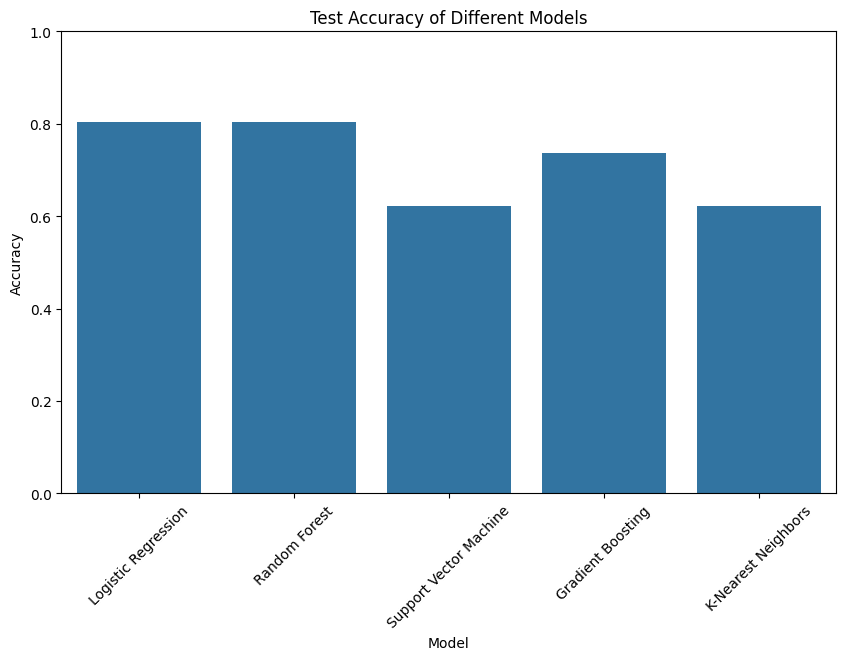

In [15]:
# Plotting accuracy rates
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df)
plt.title("Test Accuracy of Different Models")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

<strong>Building a Predictive System</strong>

In [17]:
warnings.filterwarnings("ignore", category=UserWarning)
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making prediction
prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease
